In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV


In [8]:
Headers = ["RI" , "Na", "Mg", "Al", "Si", "K", "Ca", "Ba", "Fe", "Type"]
df = pd.read_csv("glass.csv" , sep = "," , names = Headers)

In [20]:
features=df.iloc[:,:-1].columns;
data = df.loc[:,Headers]
corr = data.corr()

In [22]:
display(corr)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898
Mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
K,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278
Type,-0.164237,0.502898,-0.744993,0.598829,0.151565,-0.010054,0.000952,0.575161,-0.188278,1.000000


In [28]:
# Show in highest absolute correlation order
corr_abs = corr.abs()
corr_abs = corr_abs.unstack()
corr_abs = corr_abs.sort_values(ascending=False)
display(corr_abs.iloc[10:])

RI    Ca      0.810403
Ca    RI      0.810403
Type  Mg      0.744993
Mg    Type    0.744993
Al    Type    0.598829
                ...   
K     Mg      0.005396
Ca    Type    0.000952
Type  Ca      0.000952
RI    Ba      0.000386
Ba    RI      0.000386
Length: 90, dtype: float64

In [32]:
 # Show in highest correlation order for negative values
corr_neg = corr.unstack()
corr_neg = corr_neg.sort_values(ascending=True)
corr_neg = corr_neg[corr_neg < 0]
display(corr_neg.iloc[0:]) 

Type  Mg     -0.744993
Mg    Type   -0.744993
RI    Si     -0.542052
Si    RI     -0.542052
Ba    Mg     -0.492262
                ...   
Fe    K      -0.007719
Si    Al     -0.005524
Al    Si     -0.005524
Ba    RI     -0.000386
RI    Ba     -0.000386
Length: 62, dtype: float64

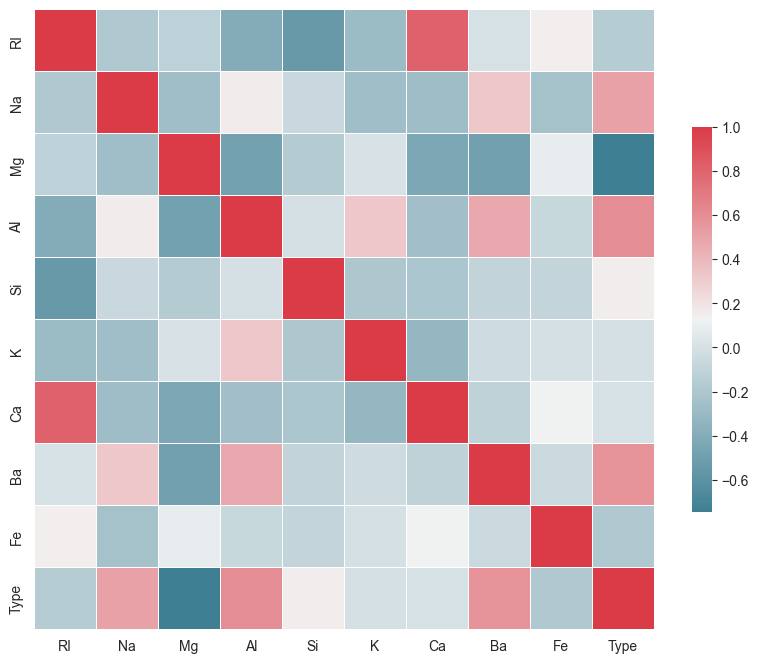

In [33]:
f, ax = plt.subplots(figsize=(10, 10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
_ = sns.heatmap(corr, cmap=cmap, square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [34]:
Y = df["Type"].values
Y = Y.astype(float)
X = df.values

# enter your code here
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [35]:
from sklearn.preprocessing import StandardScaler

# enter your code here
Scaler=StandardScaler()
X_train_scaled = Scaler.fit_transform(X_train)
X_test_scaled = Scaler.fit_transform(X_test)

In [36]:
from sklearn.metrics import classification_report
y_pred = None
rep = classification_report(y_test, y_pred)

NameError: name 'classification_report' is not defined